In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
data=pd.read_csv("timeScaling.txt", delimiter=" ")

In [94]:
theoreticalTime=[]
base_nProcesses=8
for index in range(len(data)):
    if data.iloc[index].nProcesses==base_nProcesses:
        baseTime=data.iloc[index].timeElapsed
        iteration=0
    theoreticalTime.append(baseTime/2**iteration)
    iteration+=1
data["theoreticalTime"]=theoreticalTime

In [95]:
all_nentries=data.nentries.unique()
all_kDim=data.kDim.unique()
all_nProcesses=data.nProcesses.unique()

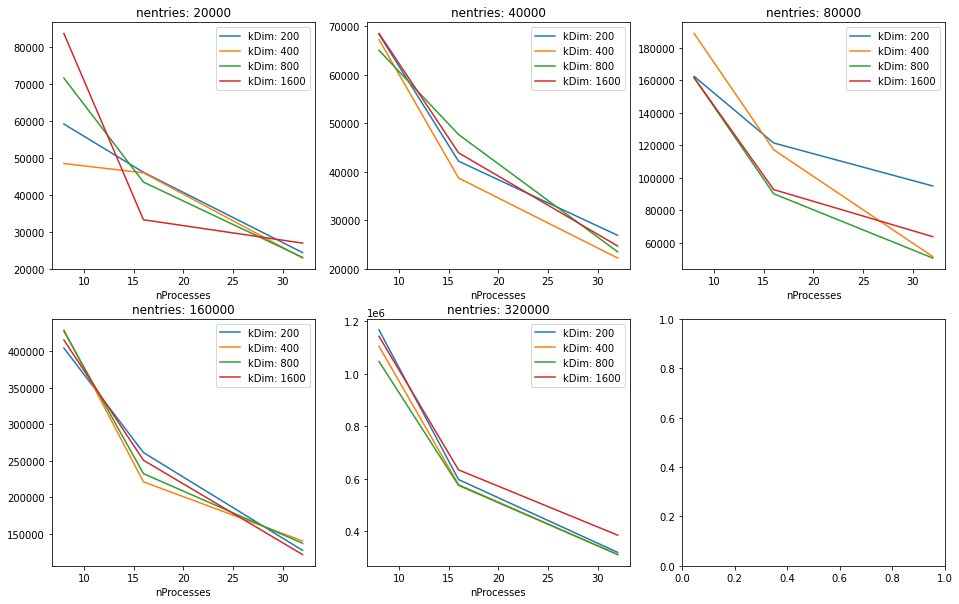

In [99]:
fig,ax=plt.subplots(2,3,figsize=(16,10))
ax=ax.flatten()

for i,nentries in enumerate(all_nentries):
    subset_nentries=data[(data.nentries==nentries)]
    for kDim in all_kDim:
        subset_kDim_nentries=subset_nentries[subset_nentries.kDim==kDim]
        subset_kDim_nentries.plot(x="nProcesses",y="timeElapsed",ax=ax[i],
                                  label="kDim: "+str(kDim))
        ax[i].set_title("nentries: "+str(nentries))

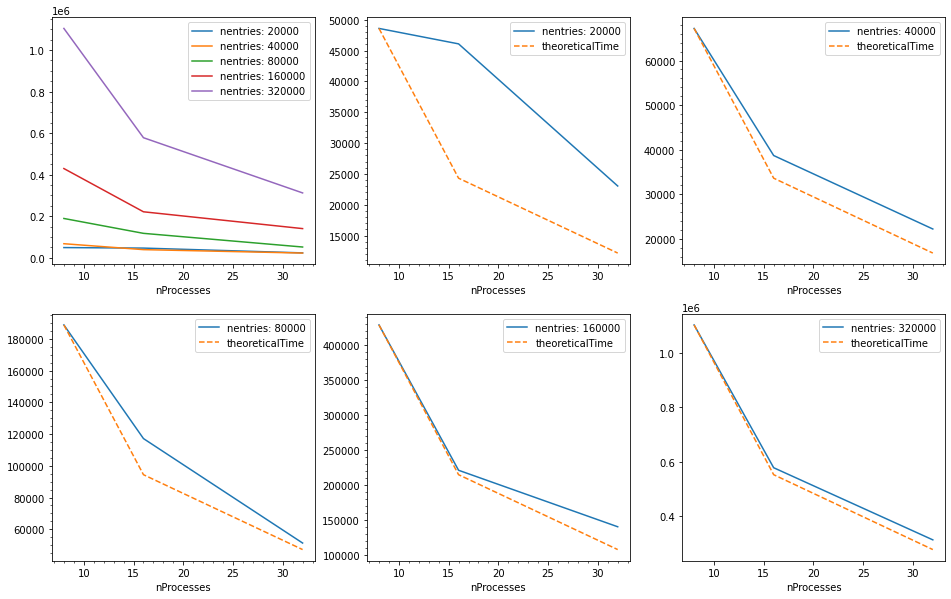

In [98]:
fig,ax=plt.subplots(2,3,figsize=(16,10))
ax=ax.flatten()
subset_kDim=data[data.kDim==400]
for i,nentries in enumerate(all_nentries):
    subset_kDim_nentries=subset_kDim[subset_kDim.nentries==nentries]
    subset_kDim_nentries.plot(x="nProcesses",y="timeElapsed",ax=ax[0],
                              label="nentries: "+str(nentries))
    subset_kDim_nentries.plot(x="nProcesses",y="timeElapsed",ax=ax[i+1],
                              label="nentries: "+str(nentries))
    subset_kDim_nentries.plot(x="nProcesses",y="theoreticalTime",ax=ax[i+1],style="--")
    ax[i].minorticks_on()
